# 7.1 Golden-section search

Golden-section search (GSS) is a derivative-free univariate optimization method, which works in a similar fashion as the bisection method discussed in Chapter 2 for solving nonlinear equations. GSS starts with an initial interval where the minimizer (maximizer) is located and continuously reduces the range of the interval until it is small enough. GSS works for a particular type of cost function and we define the function below.

\begin{definition}[Unimodal function]\label{def:unimodal}
A function $f(x)$ defined on $[a,b]$ is unimodal if there exists a point $m\in [a,b]$ such that $f(x)$ is monotonically decreasing (resp., increasing) for $x\le m$ and monotonically increasing (resp., decreasing) for $x\ge m$.
\end{definition}

So a unimodal function has a unique minimum (or maximum) on the given interval. GSS applies to unimodal functions. To illustrate the algorithm, we use the following simple degree 4 polynomial:
\begin{equation}\label{eq:golden_exa1}
f(x) = 3x^4+2x^2-x-1
\end{equation}
of which the plot is shown below.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

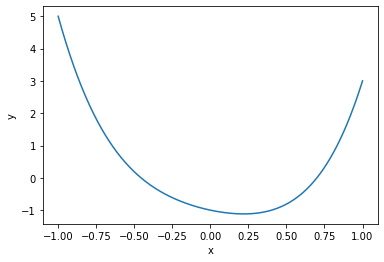

In [2]:
def f(x):
    return 3*x**4+2*x**2-x-1

x = np.linspace(-1, 1, 1000)
plt.plot(x, f(x))
plt.xlabel('x')
plt.ylabel('y');

It clear shows $f(x)$ is unimodal on the interval, e.g., $[-0.5, 0.5]$, and a unique minimum is located in this interval.

We now consider how GSS works for minimization problems. Maximization problems can be converted to minimization problems by negating the cost functions. The following figure shows the plot of a cost function $f(x)$ that is unimodal on the interval $[a,b]$ with a minimizer at $x_0$.  Our goal now is to find another two points $x_1, x_2\in [a,b]$, $x_1<x_2$, such that a new smaller interval can be constructed based on the four points. If $f(x_1)\le f(x_2)$, then we know the minimizer must be between $a$ and $x_2$, and if $f(x_1) > f(x_2)$, then $x_0\in [x_1, b]$. Both $[a, x_2]$ and $[x_1, b]$ are shorter compared to $[a,b]$. To guarantee an efficient reduction of the interval, we will ensure the following two conditions:
1. The distance between $x_1$ and $a$ is the same as that between $x_2$ and $b$. Let $l_1=x_1-a$, $l_2=x_2-x_1$, and $l_3=b-x_2$. Then we have 
    \begin{equation}\label{eq:golden1}
    l_1=l_3
    \end{equation}
2. If the interval $[a, x_2]$ becomes the new interval, the spacing of the three points $a, x_1, x_2$ is the same as that of $a, x_1, b$. Mathematically, it means
   \begin{equation}\label{eq:golden2}
   \frac{l_1}{l_2+l_3} = \frac{l_2}{l_1}
   \end{equation}
3. If the interval $[x_1, b]$ becomes the new interval, the spacing of the three points $x_1, x_2, b$ is the same as that of $a, x_1, b$. Mathematically, it means
   \begin{equation}\label{eq:golden3}
   \frac{l_1}{l_2+l_3} = \frac{l_2}{l_3}
   \end{equation}

Rewriting $l_3$ on the right hand side by $(l_2+l_3)-l_2$ in Eqn. \eqref{eq:golden3}, replacing $l_1$ by $l_3$ based on Eqn. \eqref{eq:golden1} in Eqns. \eqref{eq:golden2} and \eqref{eq:golden3}, solving for $l_2$ in Eqns. \eqref{eq:golden2} and \eqref{eq:golden3} and equating them gives the quantity $\frac{l_2+l_3}{l_3} = \frac{l_2+l_3}{l_1}$:
\begin{equation}\label{eq:golden_eqn}
\left(\frac{l_2+l_3}{l_1}\right)^2 - \frac{l_2+l_3}{l_1} - = 0
\end{equation}
So 
\begin{equation}\label{eq:golden_ratio}
\frac{l_2+l_3}{l_1} = r = \frac{\sqrt{5}+1}{2}
\end{equation}
which is the **golden ratio**.

<img src="images/golden.png" width=500 height=500 />

Therefore, once the interval $[a,b]$ is identified, we can find $x_1$ by 
\begin{equation*}
x_1=a+\frac{l_1}{l_1+(l_2+l_3)}(b-a)=a+\frac{2}{\sqrt{5}+3}(b-a)=a+\frac{3-\sqrt{5}}{2}(b-a)
\end{equation*}
and $x_2$ by 
\begin{equation*}
x_2=b-\frac{l_3}{l_1+(l_2+l_3)}(b-a) = b-\frac{l_1}{l_1+(l_2+l_3)}(b-a)=b-\frac{2}{\sqrt{5}+3}(b-a)=a+(b-a)+\frac{\sqrt{5}-3}{2}(b-a) = a+\frac{\sqrt{5}-1}{2}(b-a)
\end{equation*}
Then this process continues until a certain criterion is met, such as a specified number of steps is reached, or the length of the final interval is smaller than a prescribed threshold. The final estimated minimizer is either $a$ or $b$, depending on the values of $f(a)$ and $f(b)$.

The following Python function **golden_section** implements golden-section search. The algorithm stops when the size of the interval is smaller than a user-provided tolerance.

In [3]:
def golden_section(f, a, b, tol):
    """
    Perform golden-section search
    input:
    f: function, the function to be minimized
    a: float, the initial left end
    b: float, the initial right end
    tol: float, the tolerance for the stopping criterion
    """
    g = (np.sqrt(5)-1)/2
    while b-a > tol:
        if f(a+(1-g)*(b-a)) < f(a+g*(b-a)):
            b = a + g*(b-a)
        else:
            a += (1-g)*(b-a)
    if f(a) < f(b):
        return a
    else:
        return b

We now apply *golden_section* to locate the minizer of Eqn. \eqref{eq:golden_exa1}.

In [4]:
a = 0.0
b = 0.5
tol = 1e-9
p = golden_section(f, a, b, tol)
print('The function f has a minimum of ', f(p), ' at ', p)

The function f has a minimum of  -1.1161775914507224  at  0.21864333330456398


The minimum is achieved at around $0.22$, which is in accordance with what we see from the plot of $f$. We can animate the process of how the solution is found by golden-section search.

In [5]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [6]:
# golden-section search for the animation
def golden_section_nstep(f, a, b, nstep):
    """
    Perform golden-section search for nstep
    input:
    f: function, the function to be minimized
    a: float, the initial left end
    b: float, the initial right end
    nstep: int, the number of steps for which GSS is performed
    """
    g = (np.sqrt(5)-1)/2
    for i in range(nstep):
        if f(a+(1-g)*(b-a)) < f(a+g*(b-a)):
            b = a + g*(b-a)
        else:
            a += (1-g)*(b-a)
    if f(a) < f(b):
        return a, a, b
    else:
        return b, a, b

# Animation for the golden-section search method
a = -1
b = 1
true_sol = 0.21864333330456398
x_plot = np.linspace(-1, 1, 100)
y_plot = f(x_plot)
fig, ax = plt.subplots(figsize=(12,5))
def animate(i):
    ax.cla()
    ax.set_xlim(-1, 1)
    ax.plot(x_plot, y_plot, label='f')
    x, aa, bb = golden_section_nstep(f, a, b, i)
    ax.plot(x, f(x), 'o', ms=6, label='Golden-section search')
    ax.plot(aa, f(aa), 'x', ms = 6, label='bracket-left end')
    ax.plot(bb, f(bb), 'x', ms = 6, label='bracket-right end')
    ax.plot(true_sol, f(true_sol), 's', color='green', ms=6, label='True solution')
    ax.plot()
    ax.axhline()
    ax.axvline()
    ax.set_title('Golden-section search: iteration step '+str(i), size=16)
    ax.set_xlabel('$x$', size=16)
    ax.set_ylabel('$y$', size=16)
    ax.legend(loc='upper right')
plt.close()
anim = FuncAnimation(fig, animate, frames=20, interval=2000)
HTML(anim.to_jshtml())

The animation shows the plot of the cost function, the true solution, the bracket of each step of golden-section search and the estimated solution at each step. It can be seen that after around 10 steps, the estimated solution is alreay very close to the true minimizer.

\begin{example}\label{example:golden_sin}
Consider the negative sine function $f(x)=-\sin{x}$ on the interval $[0, \pi]$. Apply golden-section search to find the minimum.
\end{example}

We know the minimum is $-1$, achieved at $\frac{\pi}{2}$. Now we use golden-section search to obtain the results.

In [7]:
def f(x):
    return -np.sin(x)

a = 0.0
b = np.pi/2
tol = 1e-5
p = golden_section(f, a, b, tol)
print('The function f has a minimum of ', f(p), ' at ', p)

The function f has a minimum of  -1.0  at  1.5707963267948966


The same results are obtained as expected.

\begin{exercise}\label{ex:7.1}
Use golden-section search to find the maximum of the following function:
\begin{equation*}
f(x) = -x^2+\cos{(2x)}
\end{equation*}
\end{exercise}